# Random Forest Classifer

## Objective - To predict telco customer churn

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

### Step 1: Load in the required data

In [10]:
df = pd.read_csv("churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Step 2: Data Pre-processing and Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [12]:
# Let us first clean our data

# 1) Drop the TotalCharges column
df = df.drop("TotalCharges", axis=1)

In [13]:
# 2) Convert the SeniorCitizen column from int64 to object
df.SeniorCitizen= df.SeniorCitizen.apply(lambda x : 'No' if x == 0 else 'Yes')

In [15]:
# 3) Since the CustomerID column is unique, we will drop the column
df = df.drop("customerID", axis=1)

### Let's analyze the data further and see how the independent variables are related to customer churn here!

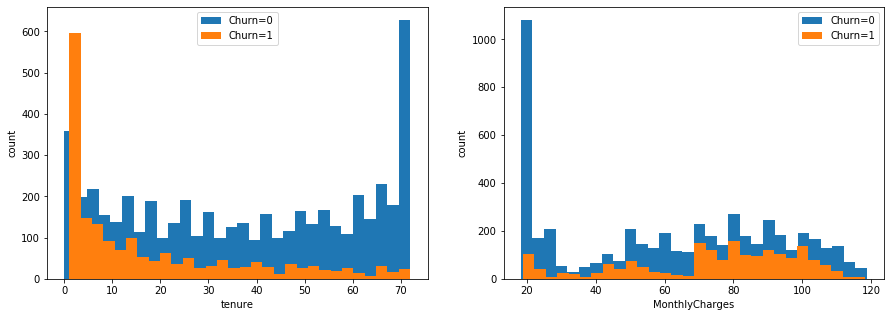

In [16]:
# Lets start by looking at the continuous variables

cvars = [i for i in df.columns if df[i].dtypes !='object']
fig,ax = plt.subplots(1,2,figsize=(15,5))

for i,x in enumerate(cvars):
    ax[i].hist(df[x][df.Churn=='No'],label='Churn=0',bins=30)
    ax[i].hist(df[x][df.Churn=='Yes'],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

#### What do you observe from the above visualizations?

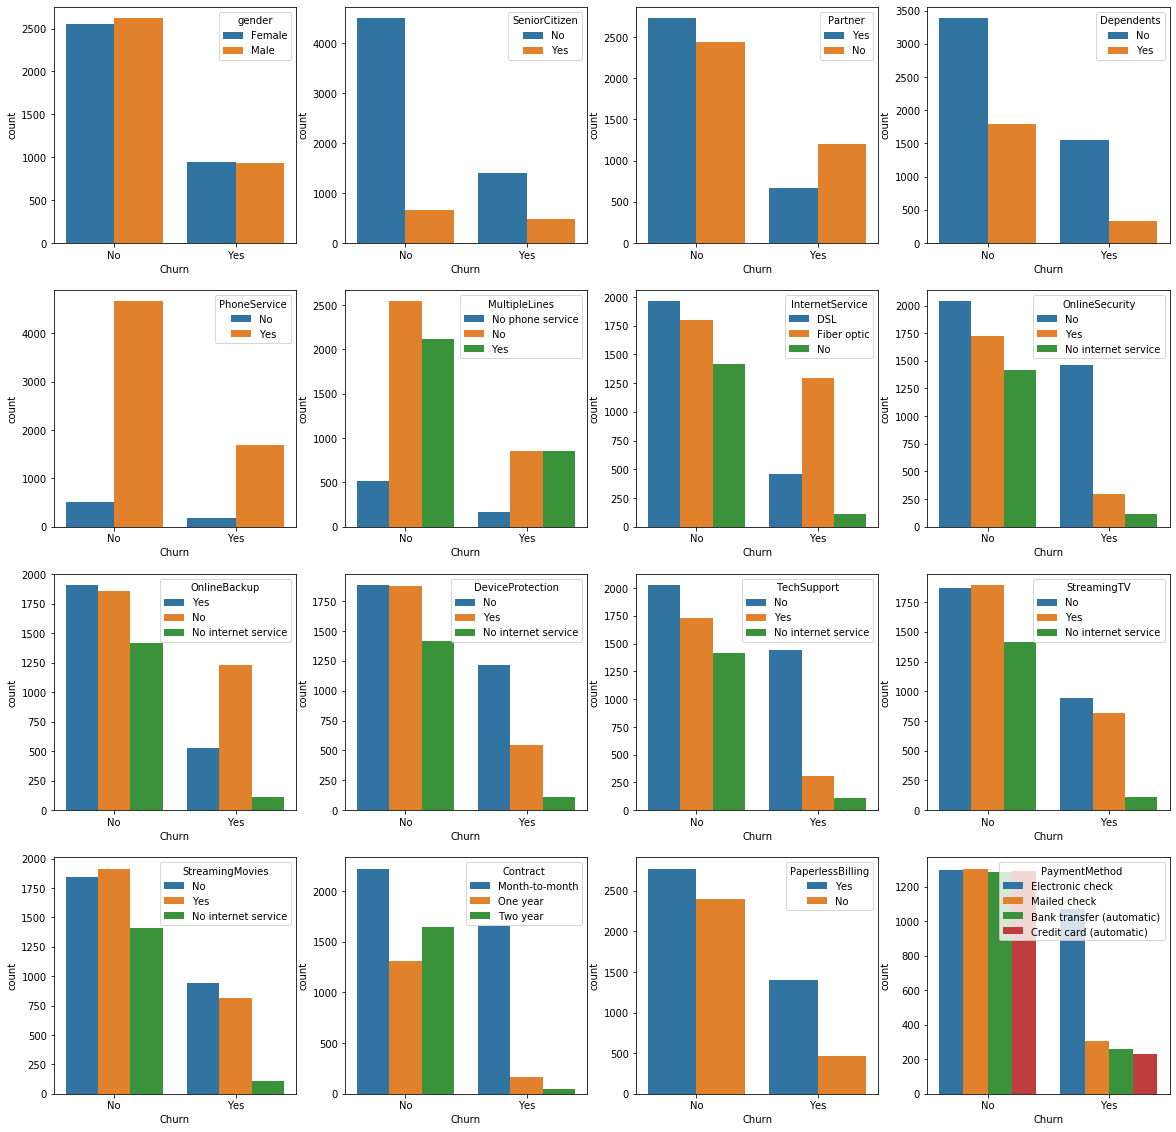

In [17]:
# Let's look at all the categorical variables and their impact on churn

# Removing churn variable for analysis
categorical_var = [i for i in df.columns if df[i].dtypes =='object']
catVars_noChurn = categorical_var[:-1]

fig ,ax = plt.subplots(4,4,figsize=(20,20))
for axi ,var in zip(ax.flat,catVars_noChurn):
    sns.countplot(x=df.Churn,hue=df[var],ax=axi)

#### Study the above charts and derive insights on how various factors are affecting the Churn. What are the main causes of churn?

#### Discuss with the trainer!

In [20]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [21]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [22]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,8,1,1,99.65,1,0,...,0,0,1,0,1,0,0,0,1,0
6,1,0,0,1,22,1,1,89.10,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0,0,0,0,10,0,0,29.75,0,1,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,28,1,1,104.80,1,0,...,1,0,1,0,1,0,0,0,1,0
9,1,0,0,1,62,1,0,56.15,0,0,...,0,0,0,0,0,1,0,0,0,0


### Step 3: Split the data and train the model

In [23]:
X=df.drop('Churn',axis=1)
y=df['Churn']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Initialize and train the machine learning model

In [26]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Step 4: Predict and Evaluate the model

In [27]:
y_pred = rf_classifier.predict(X_test)

In [28]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1298
           1       0.58      0.44      0.50       463

    accuracy                           0.77      1761
   macro avg       0.70      0.66      0.67      1761
weighted avg       0.75      0.77      0.76      1761



Text(33.0, 0.5, 'Predicted')

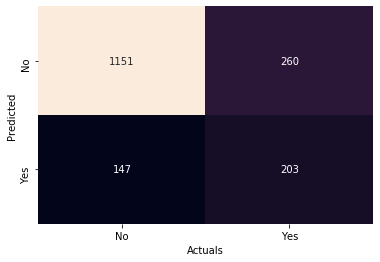

In [29]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Step 5: Get and plot features importances

In [35]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

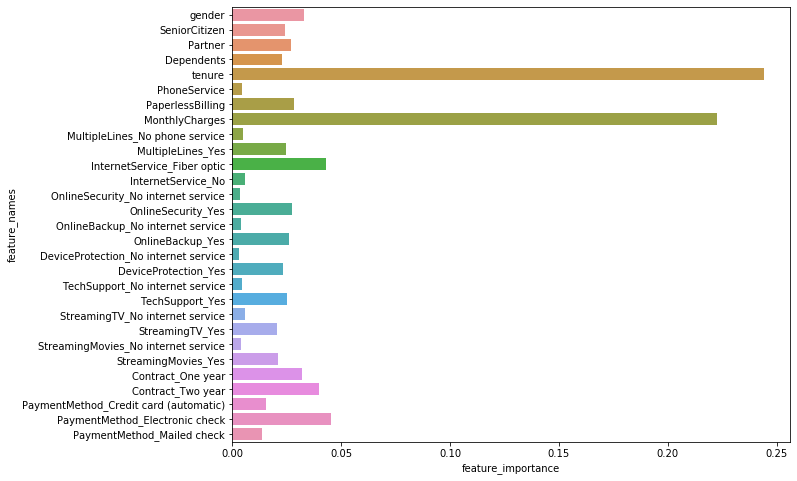

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])

#### Which are the important features from the above plot? Let's discuss

### Step 6: Visualizing individual trees

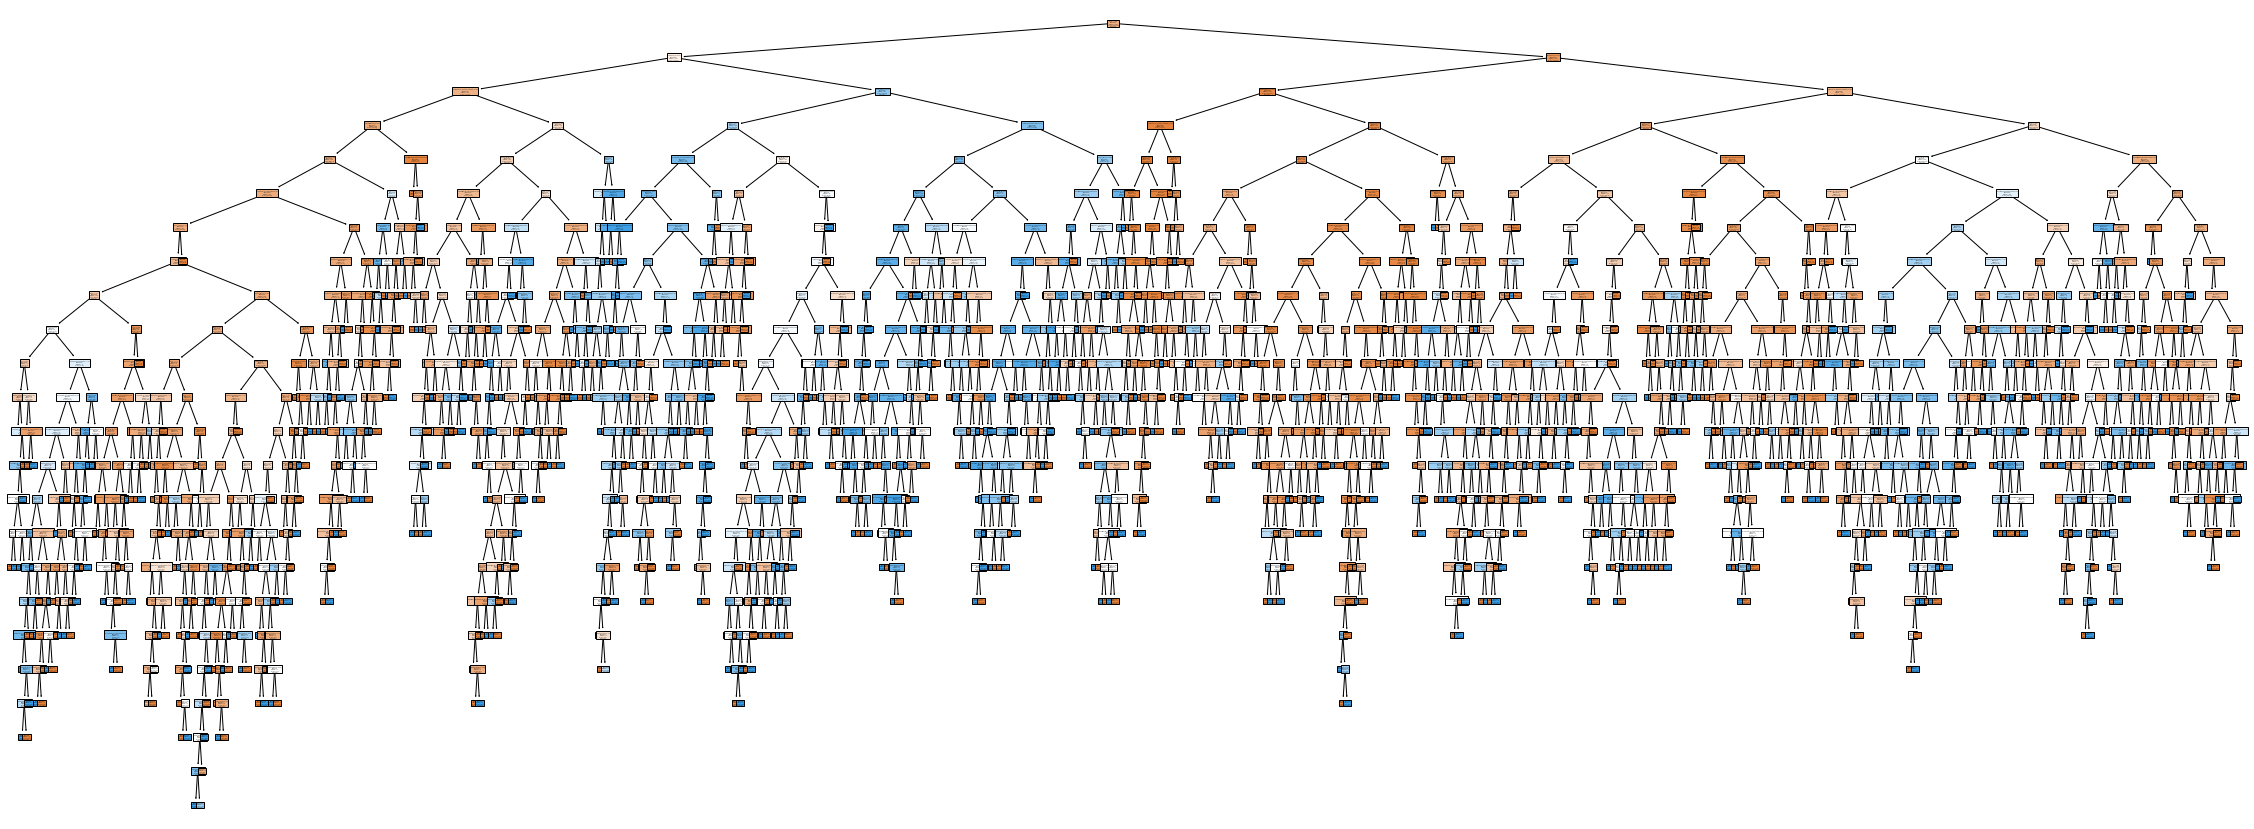

In [45]:
from sklearn import tree

fn = df.columns
cn = ["Yes","No"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,15))

tree.plot_tree(rf_classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

Note that the tree might be huge and deciphering it could take quite a while! But this is to make you understand, that if required, you can definitely plot a single tree of the forest.